In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import label_binarize
import sklearn
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score

In [4]:
df=pd.read_csv('/Users/mac/Downloads/ds_salaries.csv')


In [5]:
Location_US= df["company_location"]=="US"
df["Location"]=Location_US
df.drop(['company_location'], axis=1)
df.drop(columns=df.columns[0],axis=1,inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,False
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,False
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,False
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,False
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,True
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,True
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,True
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,True
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,True


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df['work_year']=le.fit_transform(df['work_year'])
df['Location']=le.fit_transform(df['Location'])
df['employee_residence']=le.fit_transform(df['employee_residence'])
df['salary_currency']=le.fit_transform(df['salary_currency'])
df['employment_type']=le.fit_transform(df['employment_type'])
df['experience_level']=le.fit_transform(df['experience_level'])
df['job_title']=le.fit_transform(df['job_title'])
df['company_location']=le.fit_transform(df['company_location'])
df['company_size']=le.fit_transform(df['company_size'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           607 non-null    int64
 1   experience_level    607 non-null    int64
 2   employment_type     607 non-null    int64
 3   job_title           607 non-null    int64
 4   salary              607 non-null    int64
 5   salary_currency     607 non-null    int64
 6   salary_in_usd       607 non-null    int64
 7   employee_residence  607 non-null    int64
 8   remote_ratio        607 non-null    int64
 9   company_location    607 non-null    int64
 10  company_size        607 non-null    int64
 11  Location            607 non-null    int64
dtypes: int64(12)
memory usage: 57.0 KB


In [8]:
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
0,0,2,2,22,70000,7,79833,14,0,12,0,0
1,0,3,2,41,260000,16,260000,32,0,29,2,0
2,0,3,2,7,85000,8,109024,20,50,18,1,0
3,0,2,2,47,20000,16,20000,23,0,20,2,0
4,0,3,2,38,150000,16,150000,55,50,48,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2,3,2,17,154000,16,154000,55,100,48,1,1
603,2,3,2,17,126000,16,126000,55,100,48,1,1
604,2,3,2,12,129000,16,129000,55,0,48,1,1
605,2,3,2,12,150000,16,150000,55,100,48,1,1


In [9]:
df1=df[["Location","employee_residence","salary_currency","salary_in_usd","experience_level", "remote_ratio","company_size","salary","employment_type", "job_title"  ]]
df2=df[["Location","employee_residence","salary_currency","salary_in_usd","experience_level", "remote_ratio"]]
df3=df[["Location","employee_residence","salary_currency","salary_in_usd"]]

In [10]:
df=df[["experience_level","job_title",'employee_residence','company_location']]


In [13]:

X=df.drop(['company_location'], axis=1)
y=df['company_location']

In [14]:
tree_clf = DecisionTreeClassifier( random_state=36)
tree_clf.fit(X, y)


DecisionTreeClassifier(random_state=36)

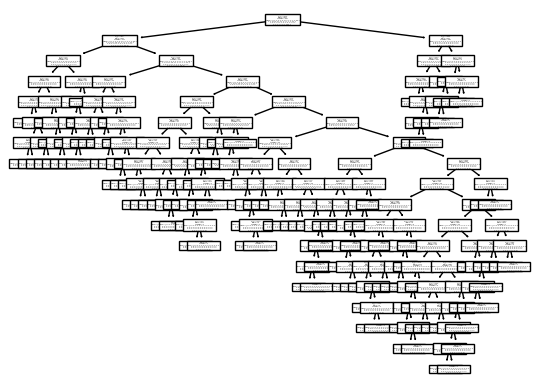

In [15]:
plot_tree(tree_clf);


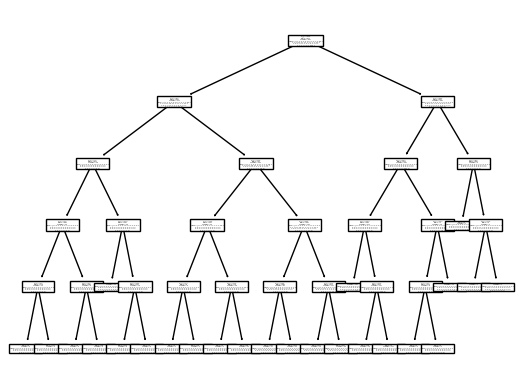

In [16]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=36)
tree_clf.fit(X, y)
plot_tree(tree_clf);

In [17]:
df=df[["job_title",'employee_residence','company_location']]
X=df.drop(['company_location'], axis=1)
y=df['company_location']

In [18]:
tree_clf = DecisionTreeClassifier(random_state=36)
tree_clf.fit(X, y)

DecisionTreeClassifier(random_state=36)

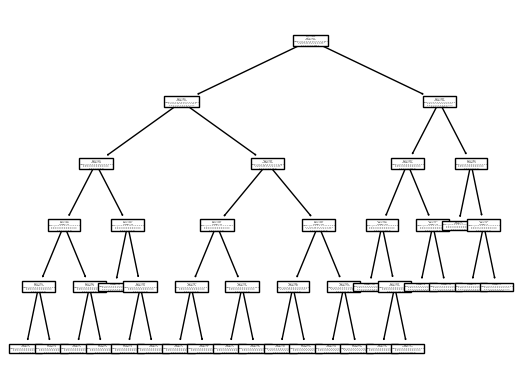

In [19]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=36)
tree_clf.fit(X, y)
plot_tree(tree_clf);


In [20]:
tree_clf.predict_proba([[22, 55]])

/Users/mac/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.]])

In [22]:


df=pd.read_csv('/Users/mac/Downloads/healthcare-dataset-stroke-data.csv')


In [23]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [25]:
df.dropna()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [26]:
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df.dropna(inplace=True)

In [27]:


X=df[["gender","hypertension","bmi"]]
#X=df[["gender","bmi"]]

y=df['stroke']


In [28]:
X

,gender,hypertension,bmi
0,1,0,36.6
2,1,0,32.5
3,0,0,34.4
4,0,1,24.0
5,1,0,29.0
...,...,...,...
5104,0,0,18.6
5106,0,0,40.0
5107,0,0,30.6
5108,1,0,25.6


In [29]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [30]:
tree_clf = DecisionTreeClassifier (max_depth=10,random_state=36)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=36)

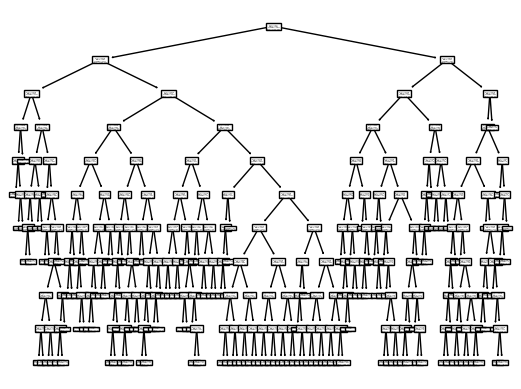

In [31]:
plot_tree(tree_clf);


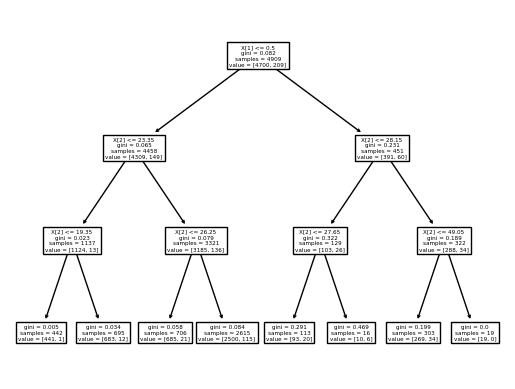

In [32]:
tree_clf = DecisionTreeClassifier (max_depth=3,random_state=36)
tree_clf.fit(X, y)
plot_tree(tree_clf);


In [33]:
tree_clf.predict_proba([[1,1,35]])


/Users/mac/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.88778878, 0.11221122]])

In [34]:
y_pred = tree_clf.predict(X_test)
print ("Decision Tree Accuracy",accuracy_score(y_test,y_pred))


Decision Tree Accuracy 0.9585879158180584


<AxesSubplot:>

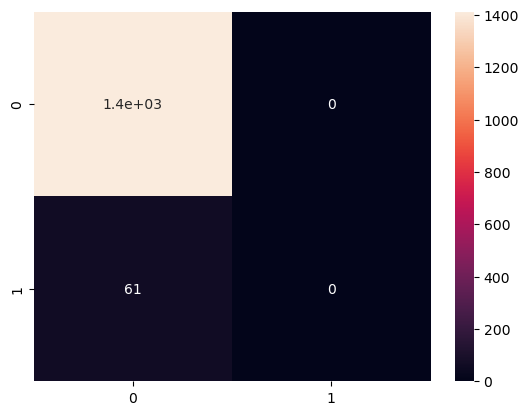

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)


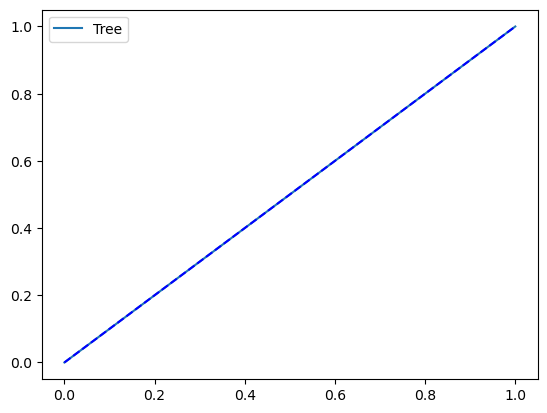

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Tree' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()


In [37]:
cm = confusion_matrix(y_test, y_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(y_pred, y_test))
print('recall = ', recall_score(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
1412 0 0 61
sensitivity = 0.9585879158180584
specificity = nan
precision = 0.0
recall =  0.0
AUC: 0.500


/var/folders/n7/nr5ftxr949scbgb4k_r1nmhc0000gn/T/ipykernel_2833/1887941644.py:7: RuntimeWarning: invalid value encountered in long_scalars
  print('specificity =' ,(tn / (tn+fp)))
/Users/mac/opt/anaconda3/envs/F21DL/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#Cross Validation score
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.95200698, 0.95720524, 0.95720524])

In [40]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus


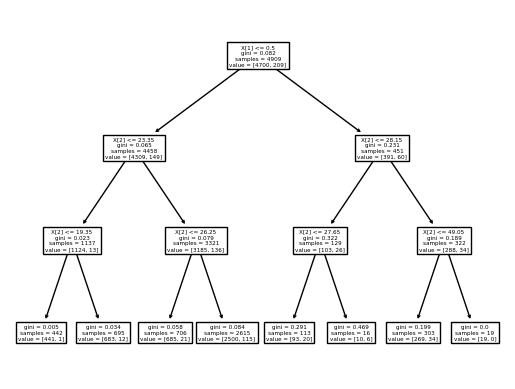

In [41]:
tree_clf = DecisionTreeClassifier (criterion="gini", max_depth=3,random_state=36)
tree_clf.fit(X, y)
plot_tree(tree_clf);
plt.savefig('gini.pdf')

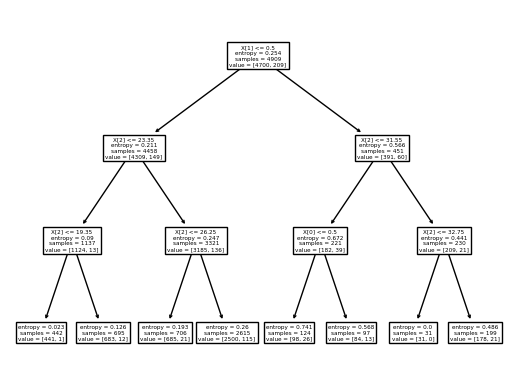

In [42]:
tree_clf = DecisionTreeClassifier (criterion="entropy", max_depth=3,random_state=36)
tree_clf.fit(X, y)
plot_tree(tree_clf);
plt.savefig('entropy.pdf')

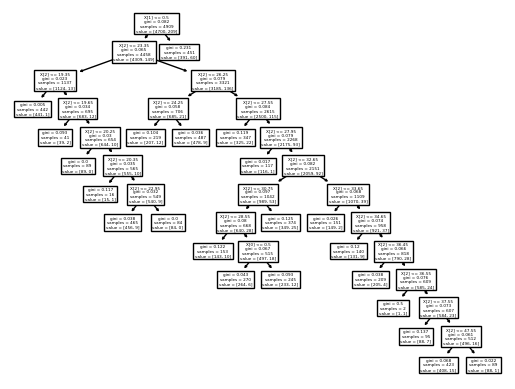

In [43]:
tree_clf = DecisionTreeClassifier (min_samples_split=500,criterion="gini",random_state=36)
tree_clf.fit(X, y)
plot_tree(tree_clf);
plt.savefig('min.pdf')

In [44]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(DecisionTreeClassifier(),{
    'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,6]
    
},cv=5,return_train_score=False)


In [45]:
clf.fit(X,y)
clf.cv_results_


{'mean_fit_time': array([0.00398078, 0.00243669, 0.0022357 , 0.00238004, 0.00218019,
        0.00143695, 0.00162005, 0.00179367, 0.00192103, 0.0020577 ]),
 'std_fit_time': array([1.93991671e-03, 1.76148668e-04, 6.09765293e-05, 1.95602915e-04,
        1.07486817e-04, 9.23894605e-05, 4.84587155e-05, 3.79822273e-05,
        3.87870025e-05, 5.36104944e-05]),
 'mean_score_time': array([0.001581  , 0.00096273, 0.0008214 , 0.00089059, 0.00073524,
        0.00063353, 0.00061631, 0.0006371 , 0.0006176 , 0.00063949]),
 'std_score_time': array([6.65599829e-04, 8.25023370e-05, 4.64935547e-05, 2.19069422e-04,
        1.36258285e-04, 3.12989750e-05, 7.48953174e-06, 4.29519921e-05,
        7.91693295e-06, 4.01139950e-05]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'entropy',
                    'entropy', 'entropy', 'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_val

In [46]:
df=pd.DataFrame(clf.cv_results_)
df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003981,0.001940,0.001581,0.000666,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.957230,0.957230,0.957230,0.957230,0.958206,0.957425,0.000390,2
1,0.002437,0.000176,0.000963,0.000083,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.957230,0.958248,0.957230,0.957230,0.958206,0.957629,0.000489,1
2,0.002236,0.000061,0.000821,0.000046,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.957230,0.958248,0.955193,0.957230,0.957187,0.957018,0.000996,5
3,0.002380,0.000196,0.000891,0.000219,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.955193,0.957230,0.955193,0.957230,0.957187,0.956407,0.000991,8
4,0.002180,0.000107,0.000735,0.000136,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.955193,0.956212,0.955193,0.953157,0.956167,0.955185,0.001107,10
5,0.001437,0.000092,0.000634,0.000031,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.957230,0.957230,0.957230,0.957230,0.958206,0.957425,0.000390,2
6,0.001620,0.000048,0.000616,0.000007,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.957230,0.957230,0.957230,0.957230,0.958206,0.957425,0.000390,2
7,0.001794,0.000038,0.000637,0.000043,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.957230,0.957230,0.955193,0.957230,0.957187,0.956814,0.000810,6
8,0.001921,0.000039,0.000618,0.000008,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.955193,0.958248,0.956212,0.956212,0.957187,0.956610,0.001034,7
9,0.002058,0.000054,0.000639,0.000040,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.955193,0.958248,0.953157,0.955193,0.956167,0.955592,0.001651,9


In [47]:
clf.best_params_


{'criterion': 'gini', 'max_depth': 3}

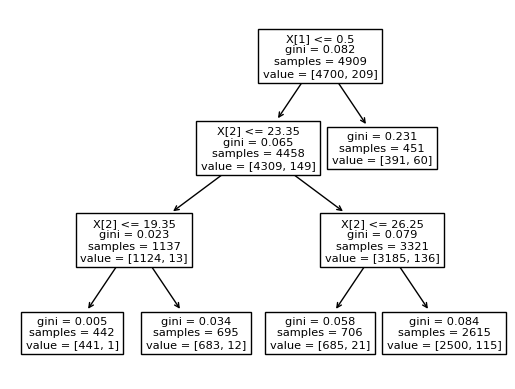

In [48]:
tree_clf = DecisionTreeClassifier (min_samples_split=500,criterion="gini",random_state=36,max_depth=3)
tree_clf.fit(X, y)
plot_tree(tree_clf);
plt.savefig('entropy.pdf')


In [49]:
y_pred = tree_clf.predict(X_test)
print ("Decision Tree Accuracy",accuracy_score(y_test,y_pred))

Decision Tree Accuracy 0.9585879158180584


Decision Tree Accuracy 0.9585879158180584


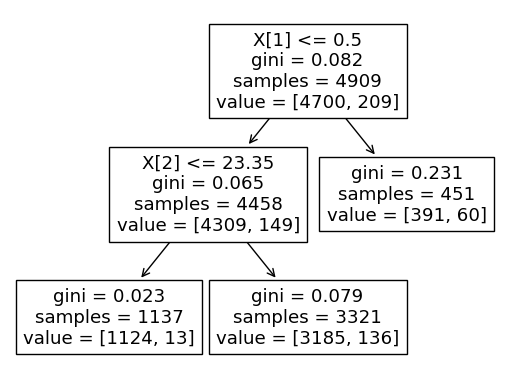

In [50]:
tree_clf = DecisionTreeClassifier (min_samples_split=500,criterion="gini",random_state=36,max_depth=2)
tree_clf.fit(X, y)
plot_tree(tree_clf);
plt.savefig('entropy.pdf')
y_pred = tree_clf.predict(X_test)
print ("Decision Tree Accuracy",accuracy_score(y_test,y_pred))


Decision Tree Accuracy 0.9585879158180584


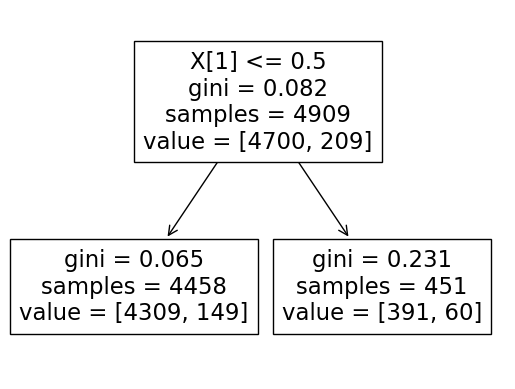

In [51]:
tree_clf = DecisionTreeClassifier (min_samples_split=500,criterion="gini",random_state=36,max_depth=1)
tree_clf.fit(X, y)
plot_tree(tree_clf);
plt.savefig('entropy.pdf')
y_pred = tree_clf.predict(X_test)
print ("Decision Tree Accuracy",accuracy_score(y_test,y_pred))

In [52]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=20)


In [53]:
tree_clf = DecisionTreeClassifier (min_samples_split=500,criterion="entropy",random_state=36,max_depth=3)
tree_clf.fit(X, y)
y_pred = tree_clf.predict(X_test)
print ("Decision Tree Accuracy",accuracy_score(y_test,y_pred))

Decision Tree Accuracy 0.9572301425661914


<AxesSubplot:>

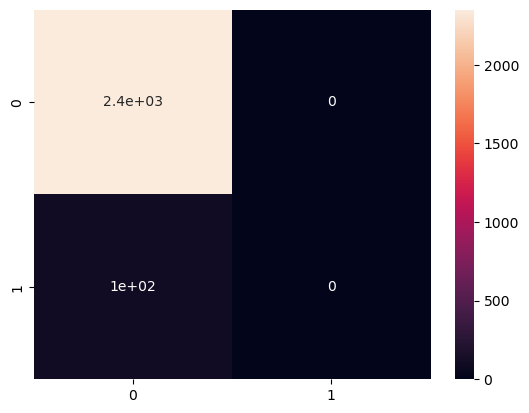

In [54]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)


In [55]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.6, random_state=20)


In [56]:
tree_clf = DecisionTreeClassifier (min_samples_split=500,criterion="gini",random_state=36,max_depth=3)
tree_clf.fit(X, y)
y_pred = tree_clf.predict(X_test)
print ("Decision Tree Accuracy",accuracy_score(y_test,y_pred))


Decision Tree Accuracy 0.9582484725050916


In [57]:
rfc=RandomForestClassifier(min_samples_split=500,criterion="gini",random_state=36,max_depth=3)
rfc.fit(X, y)
y_pred = rfc.predict(X_test)
print ("random",accuracy_score(y_test,y_pred))


random 0.9582484725050916


In [58]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=20)


In [59]:
rfc=RandomForestClassifier(min_samples_split=500,criterion="gini",random_state=36,max_depth=3)
rfc.fit(X, y)
y_pred = tree_clf.predict(X_test)
print ("random",accuracy_score(y_test,y_pred))


random 0.9572301425661914


In [60]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003981,0.001940,0.001581,0.000666,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.957230,0.957230,0.957230,0.957230,0.958206,0.957425,0.000390,2
1,0.002437,0.000176,0.000963,0.000083,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.957230,0.958248,0.957230,0.957230,0.958206,0.957629,0.000489,1
2,0.002236,0.000061,0.000821,0.000046,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.957230,0.958248,0.955193,0.957230,0.957187,0.957018,0.000996,5
3,0.002380,0.000196,0.000891,0.000219,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.955193,0.957230,0.955193,0.957230,0.957187,0.956407,0.000991,8
4,0.002180,0.000107,0.000735,0.000136,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.955193,0.956212,0.955193,0.953157,0.956167,0.955185,0.001107,10
5,0.001437,0.000092,0.000634,0.000031,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.957230,0.957230,0.957230,0.957230,0.958206,0.957425,0.000390,2
6,0.001620,0.000048,0.000616,0.000007,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.957230,0.957230,0.957230,0.957230,0.958206,0.957425,0.000390,2
7,0.001794,0.000038,0.000637,0.000043,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.957230,0.957230,0.955193,0.957230,0.957187,0.956814,0.000810,6
8,0.001921,0.000039,0.000618,0.000008,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.955193,0.958248,0.956212,0.956212,0.957187,0.956610,0.001034,7
9,0.002058,0.000054,0.000639,0.000040,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.955193,0.958248,0.953157,0.955193,0.956167,0.955592,0.001651,9


In [61]:
df=pd.read_csv('/Users/mac/Downloads/healthcare-dataset-stroke-data.csv')

In [62]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [63]:
df.dropna()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [64]:
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])



In [65]:
X=df[["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"]]


y=df['stroke']


In [66]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)


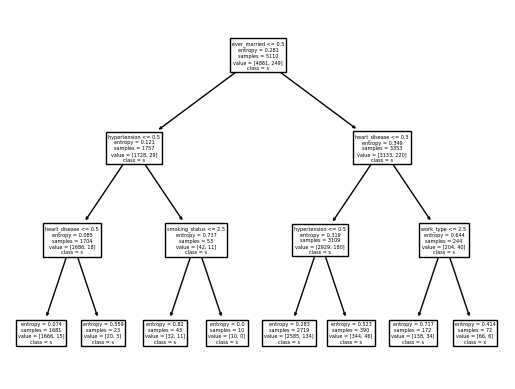

In [67]:
tree_clf = DecisionTreeClassifier (criterion="entropy",random_state=36,max_depth=3)
tree_clf.fit(X, y)
plot_tree(tree_clf,feature_names=("gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"),
          class_names="stroke",);
plt.savefig('new_entropy.pdf')

In [68]:
y_pred = tree_clf.predict(X_test)
print ("Decision Tree Accuracy",accuracy_score(y_test,y_pred))


Decision Tree Accuracy 0.9510763209393346


In [69]:
rfc=RandomForestClassifier(criterion="gini",random_state=36,max_depth=3)
rfc.fit(X, y)
y_pred = rfc.predict(X_test)
print ("random",accuracy_score(y_test,y_pred))


random 0.9510763209393346


In [70]:


from sklearn.tree import export_graphviz


In [71]:


estimator=rfc.estimators_[5]

In [72]:
export_graphviz(estimator, out_file="tree.dot",
rounded=True)


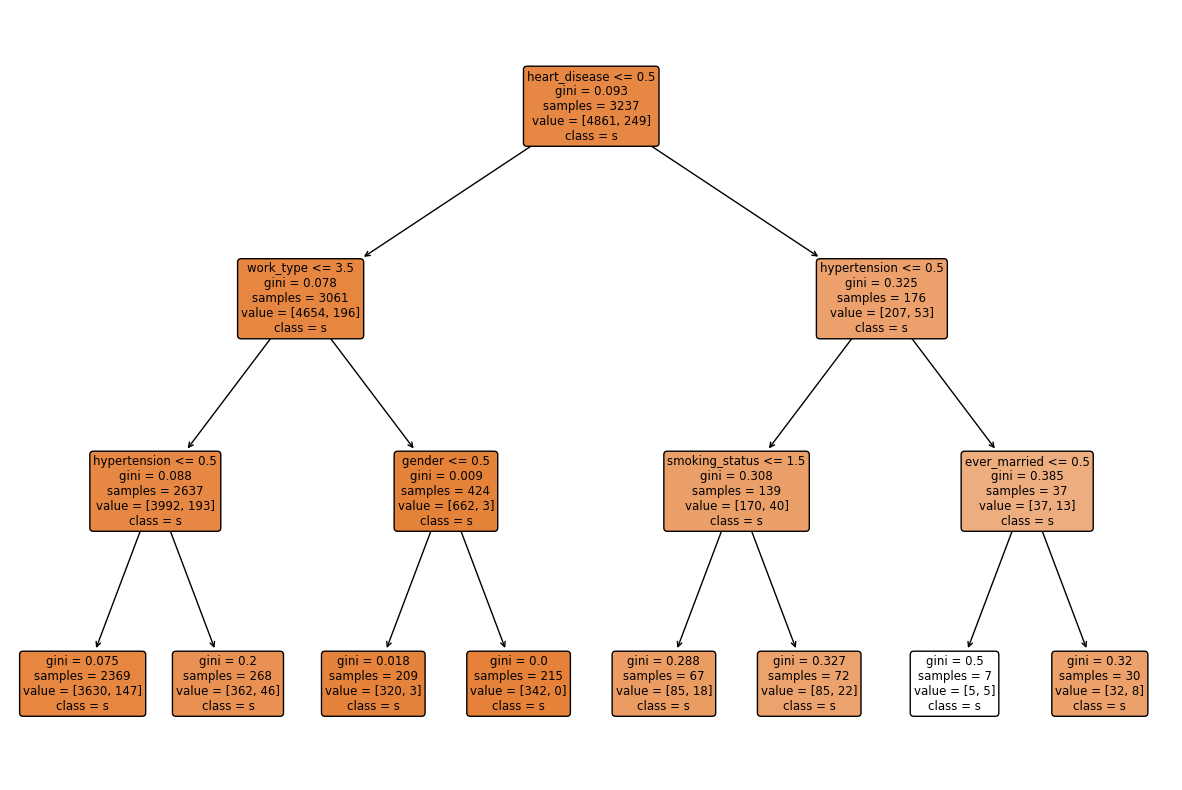

In [73]:
fig = plt.figure(figsize=(15, 10))
plot_tree(rfc.estimators_[0], 
          feature_names=("gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"),
          class_names="stroke",
          filled=True, impurity=True, 
          rounded=True)
plt.savefig('rfc.pdf')


In [74]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0
